# 인공 신경망_분류

In [1]:
execfile('setting.py')

In [2]:
%matplotlib inline 

In [3]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

## 데이터 구성하기

In [4]:
df_raw = pd.read_csv(path2 + '유방암.csv',encoding="euc-kr")
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [5]:
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)

## 데이터 전처리

In [6]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


## 모델 생성

#### 기본 옵션으로 NN 모델 생성

In [7]:
nn_uncustomized = MLPClassifier(hidden_layer_sizes=(100,),random_state=1234)
# nn_uncustomized = MLPClassifier(random_state=1234, hidden_layer_sizes=(100,))
nn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

MLPClassifier(random_state=1234)

Accuracy on training set: 0.599
Accuracy on test set: 0.758


- 정확도는 Train 약 60%, Test는 75.8%로 매우 낮음 --> 과소적합

In [8]:
# 실행옵션 확인
print(nn_uncustomized.get_params().keys())
print(nn_uncustomized.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


#### Hidden Layer : 은닉층 변경

In [9]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 : 5~100

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


MLPClassifier(hidden_layer_sizes=(5, 5), random_state=1234)

MLPClassifier(hidden_layer_sizes=(10, 10), random_state=1234)

MLPClassifier(hidden_layer_sizes=(15, 15), random_state=1234)

MLPClassifier(hidden_layer_sizes=(20, 20), random_state=1234)

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234)

MLPClassifier(hidden_layer_sizes=(30, 30), random_state=1234)

MLPClassifier(hidden_layer_sizes=(35, 35), random_state=1234)

MLPClassifier(hidden_layer_sizes=(40, 40), random_state=1234)

MLPClassifier(hidden_layer_sizes=(45, 45), random_state=1234)

MLPClassifier(hidden_layer_sizes=(50, 50), random_state=1234)

MLPClassifier(hidden_layer_sizes=(55, 55), random_state=1234)

MLPClassifier(hidden_layer_sizes=(60, 60), random_state=1234)

MLPClassifier(hidden_layer_sizes=(65, 65), random_state=1234)

MLPClassifier(hidden_layer_sizes=(70, 70), random_state=1234)

MLPClassifier(hidden_layer_sizes=(75, 75), random_state=1234)

MLPClassifier(hidden_layer_sizes=(80, 80), random_state=1234)

MLPClassifier(hidden_layer_sizes=(85, 85), random_state=1234)

MLPClassifier(hidden_layer_sizes=(90, 90), random_state=1234)

MLPClassifier(hidden_layer_sizes=(95, 95), random_state=1234)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1234)

In [10]:
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

HiddenLayer  TrainAccuracy  TestAccuracy
0             5          0.599         0.758
1            10          0.594         0.750
2            15          0.401         0.242
3            20          0.901         0.875
4            25          0.870         0.898
5            30          0.599         0.758
6            35          0.932         0.914
7            40          0.599         0.758
8            45          0.938         0.938
9            50          0.932         0.906
10           55          0.599         0.758
11           60          0.943         0.875
12           65          0.927         0.961
13           70          0.938         0.938
14           75          0.927         0.883
15           80          0.599         0.758
16           85          0.932         0.906
17           90          0.927         0.922
18           95          0.885         0.844
19          100          0.875         0.859

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'Hidden Layer')

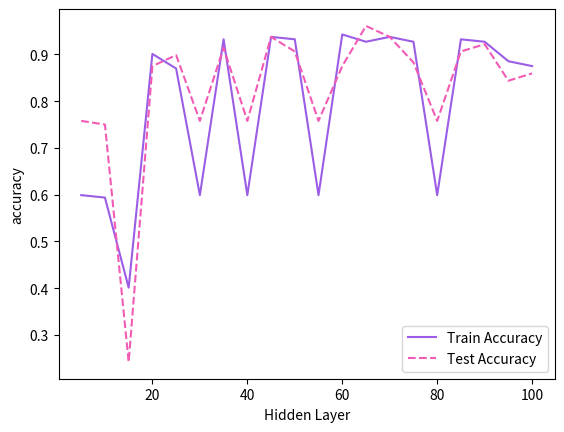

In [11]:
# 정확도 그래프 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

- 구조가 복잡할수록 성능이 개선되는 경향을 보임 (과소적합은 구조가 복잡하지않아 이를 해결하기위해)

#### Activation : 활성화 함수 변경

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

MLPClassifier(activation='logistic', random_state=1234)

MLPClassifier(activation='tanh', random_state=1234)

MLPClassifier(random_state=1234)

In [13]:
para_function

['logistic', 'tanh', 'relu']

In [14]:
# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

ActivationFunction  TrainAccuracy  TestAccuracy
0           logistic          0.943         0.898
1               tanh          0.943         0.906
2               relu          0.599         0.758

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'Activation Function')

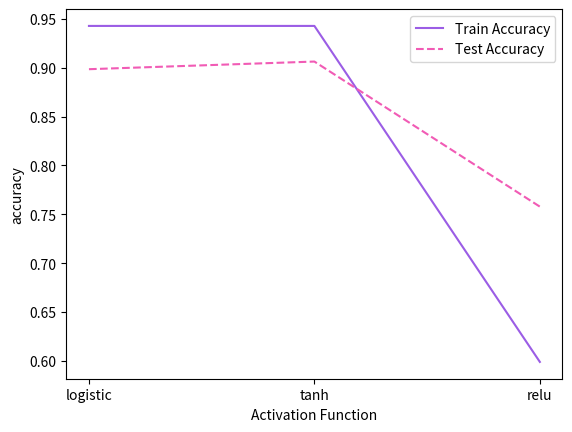

In [15]:
# 정확도 그래프 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

#### scale 변환

In [16]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0    -0.157678     -0.879112       -0.165550  -0.232872        -0.744948   
1    -1.312779     -2.560965       -1.328928  -1.150194        -0.240274   
2     0.695279     -0.420644        0.602798   0.596040        -0.947380   
3    -0.211154     -1.301385       -0.255876  -0.308762        -1.291796   
4    -0.753945     -1.738136       -0.820314  -0.745704        -2.095198   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0         -0.479220       -0.550769            -0.628488      -0.997431   
1         -1.153621       -1.143404            -1.199934      -1.773612   
2         -0.675307       -0.477679            -0.212084      -0.899042   
3         -0.661126       -0.788224            -0.834410      -0.658535   
4         -1.505004       -1.175403            -1.326415      -1.933950   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0               -0.392627  ...     -0.149283      -1.156442        -0.153789   
1                0.184077  ...     -1.341759      -2.517236        -1.380396   
2               -1.174101  ...      0.534893      -0.143296         0.445031   
3               -0.834209  ...     -0.263312      -1.490846        -0.312546   
4               -0.956793  ...     -0.951354      -1.934512        -0.997708   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0   -0.224951          0.490637           0.139396        -0.094470   
1   -1.124201          0.254373          -1.046076        -1.159323   
2    0.432104         -0.613360          -0.367031         0.004076   
3   -0.354487         -1.339335          -0.169261        -0.176669   
4   -0.869505         -1.783511          -1.108951        -1.094404   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0             -0.301949        0.525611                 0.511081  
1             -1.480312       -1.387506                -0.507149  
2              0.172850        0.223844                -0.886803  
3             -0.458230       -0.524077                -0.220788  
4             -1.366747       -1.071301                -0.898278  

[5 rows x 30 columns]

In [17]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


#### scale 조절 후 MLPClassifier 모델 재실행

In [18]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

MLPClassifier(random_state=1234)

Accuracy on training set: 0.995
Accuracy on test set: 0.953


In [19]:
nn_scaled

MLPClassifier(random_state=1234)

#### Hidden Layer : 은닉층 변경

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 : 5~100

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234)
#    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), solver='sgd', random_state = 1234)    
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


MLPClassifier(hidden_layer_sizes=(5, 5), random_state=1234)

MLPClassifier(hidden_layer_sizes=(10, 10), random_state=1234)

MLPClassifier(hidden_layer_sizes=(15, 15), random_state=1234)

MLPClassifier(hidden_layer_sizes=(20, 20), random_state=1234)

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234)

MLPClassifier(hidden_layer_sizes=(30, 30), random_state=1234)

MLPClassifier(hidden_layer_sizes=(35, 35), random_state=1234)

MLPClassifier(hidden_layer_sizes=(40, 40), random_state=1234)

MLPClassifier(hidden_layer_sizes=(45, 45), random_state=1234)

MLPClassifier(hidden_layer_sizes=(50, 50), random_state=1234)

MLPClassifier(hidden_layer_sizes=(55, 55), random_state=1234)

MLPClassifier(hidden_layer_sizes=(60, 60), random_state=1234)

MLPClassifier(hidden_layer_sizes=(65, 65), random_state=1234)

MLPClassifier(hidden_layer_sizes=(70, 70), random_state=1234)

MLPClassifier(hidden_layer_sizes=(75, 75), random_state=1234)

MLPClassifier(hidden_layer_sizes=(80, 80), random_state=1234)

MLPClassifier(hidden_layer_sizes=(85, 85), random_state=1234)

MLPClassifier(hidden_layer_sizes=(90, 90), random_state=1234)

MLPClassifier(hidden_layer_sizes=(95, 95), random_state=1234)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1234)

In [21]:
# 은닉층별 정확도 테이블 
df_accuracy_hidden.round(3)

HiddenLayer  TrainAccuracy  TestAccuracy
0             5          0.953         0.891
1            10          0.984         0.938
2            15          0.984         0.922
3            20          0.984         0.945
4            25          0.995         0.961
5            30          1.000         0.953
6            35          0.995         0.945
7            40          1.000         0.938
8            45          1.000         0.953
9            50          1.000         0.945
10           55          1.000         0.961
11           60          1.000         0.953
12           65          1.000         0.938
13           70          1.000         0.945
14           75          1.000         0.953
15           80          1.000         0.945
16           85          1.000         0.953
17           90          1.000         0.945
18           95          1.000         0.945
19          100          1.000         0.945

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'Hidden Layer')

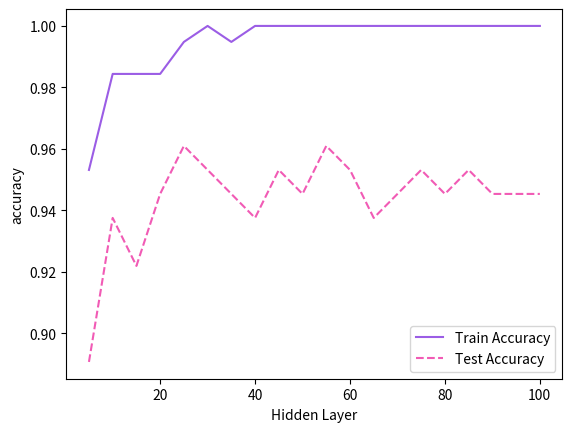

In [22]:
# 정확도 그래프 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

- 은닉층 구조가 복잡할수록 모델 정확도는 증가함
- Train 모델은 40 이후 과적합 경향이 보이고 test모델은 정확도 변동이 보임.
- 모델 특성(과적합 경향성 등)을 고려하여 40선택

In [23]:
# 은닉층 지정(임의)
hidden_layer_sizes = 40

### Activation : 활성화 함수 변경

In [24]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (40,40), random_state = 1234)
#     nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (40,60,20), random_state = 1234)  # 변경 가능
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy


MLPClassifier(activation='logistic', hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 40), random_state=1234)

MLPClassifier(hidden_layer_sizes=(40, 40), random_state=1234)

In [25]:
# Activation Function별 정확도 테이블 
df_accuracy_function.round(3)

ActivationFunction  TrainAccuracy  TestAccuracy
0           logistic          0.995         0.938
1               tanh          1.000         0.953
2               relu          1.000         0.938

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'Activation Function')

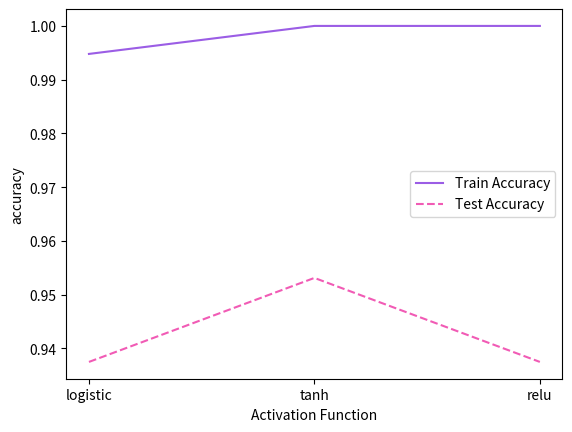

In [26]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

- scale 적용 데이터 경우 "tanh"함수를 사용한 모델의 정확도가 가장 높음.

In [27]:
# Activation Function 지정(임의)
activation = "tanh"

### Solver : 가중치 최적화 변경

In [28]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="tanh", hidden_layer_sizes=(40,40), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 40), random_state=1234,
              solver='lbfgs')

MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 40), random_state=1234,
              solver='sgd')

MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 40), random_state=1234)

In [29]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

Solver  TrainAccuracy  TestAccuracy
0  lbfgs          1.000         0.945
1    sgd          0.953         0.875
2   adam          1.000         0.953

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'Solver')

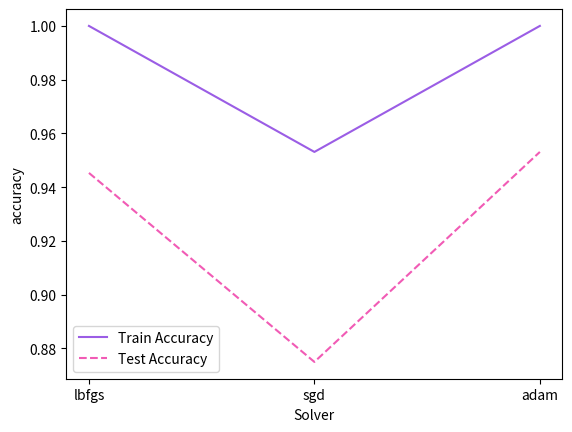

In [30]:
# 정확도 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()

- "adam" 최적화 적용시 정확도가 높아서 선택

In [31]:
# Solver 지정(임의)
solver = "adam" 

### Mini Batch 변경

In [32]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경. 20~180
para_batch = [20 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "tanh", 
                       hidden_layer_sizes = (40,40) , random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

[20, 40, 60, 80, 100, 120, 140, 160, 180]


MLPClassifier(activation='tanh', batch_size=20, hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=40, hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=60, hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=80, hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=100, hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=140, hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=160, hidden_layer_sizes=(40, 40),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=180, hidden_layer_sizes=(40, 40),
              random_state=1234)

In [33]:
# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

Mini Batch  TrainAccuracy  TestAccuracy
0          20            1.0         0.953
1          40            1.0         0.953
2          60            1.0         0.953
3          80            1.0         0.953
4         100            1.0         0.953
5         120            1.0         0.953
6         140            1.0         0.953
7         160            1.0         0.953
8         180            1.0         0.953

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'Mini Batch Size')

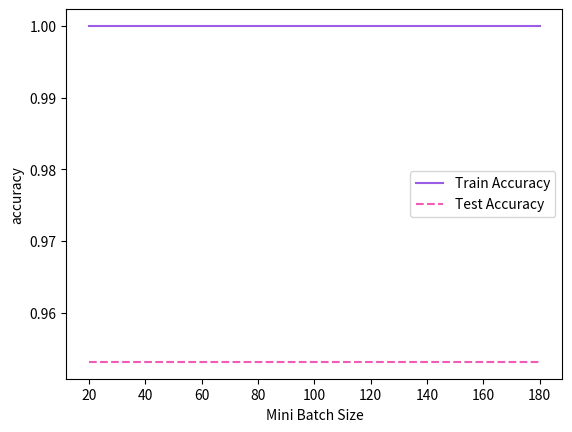

In [34]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

- Train 모델은 과적합 경향, test데이터는 변화 없음. --> 미니배치 미지정

## 결론 도출

In [35]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(40, 40), activation="tanh", solver="adam", 
                         random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

MLPClassifier(activation='tanh', hidden_layer_sizes=(40, 40), random_state=1234)

Accucary on training set: 1.000
Accuracy on test set: 0.953

Confusion matrix: 
[[91  6]
 [ 0 31]]
              precision    recall  f1-score   support

           0      1.000     0.938     0.968        97
           1      0.838     1.000     0.912        31

    accuracy                          0.953       128
   macro avg      0.919     0.969     0.940       128
weighted avg      0.961     0.953     0.954       128



- test 모델 기준 정확도는 95.3%
- "1" 기준 f1-score은 91.2%, precision(정밀도=83.8%),recall(재현율 = 100%) > 0.5 인 높은 값 도출

- 결론: 기존의 정확도는 과소적합이기때문에 구조를 복잡하게 만들 필요가 있었다. 
    --> Hidden Layer(은닉층)를 통해 구조를 조금 복잡하게 하여 적당한 모델의 경향을 띄도록 만듬
    -->성단위를 맞추기 위해 scaling 적용 후 tanh 활성화 함수 선택
    --> Adam의 가중치 최적화를 선택하여 모델 성능 개선.
    --> 미니배치는 지정하지않고 최종 모델 선택
    
    : 인공 신경망은 노드들의 그룹으로 연결되어 있으며 학습을 통해 시냅스의 가중치를 조절해 모델 생성함을 알 수 있음. 이러한 모델은 유전자 분석, 필기체 인식 ,물체 인식에 활용 될 것으로 보음

# KNN

In [36]:
execfile('setting.py')

In [37]:
%matplotlib inline 

In [38]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

## 데이터 구성하기

In [39]:
df_raw = pd.read_csv(path2 + '유방암.csv',encoding="euc-kr")
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [40]:
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)

## 데이터 전처리

In [41]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


## 모델 생성

#### 기본 옵션으로 KNN 모델 생성

In [42]:
# KNN 모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncusotomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncusotomized.score(df_test_x, df_test_y)))

KNeighborsClassifier()

Accuracy on training set: 0.932
Accuracy on test set: 0.914


In [43]:
# 실행옵션 확인
print(knn_uncusotomized.get_params().keys())
print(knn_uncusotomized.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


#### 이웃 수 증가에 따른 정확도 변화

In [44]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

Neighbors  TrainAccuracy  TestAccuracy
0           1          1.000         0.898
1           2          0.938         0.914
2           3          0.932         0.898
3           4          0.911         0.891
4           5          0.932         0.914
5           6          0.927         0.914
6           7          0.927         0.898
7           8          0.922         0.914
8           9          0.911         0.906
9          10          0.911         0.906
10         11          0.917         0.906
11         12          0.917         0.906
12         13          0.911         0.914
13         14          0.917         0.906
14         15          0.917         0.906

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'n_neighbors')

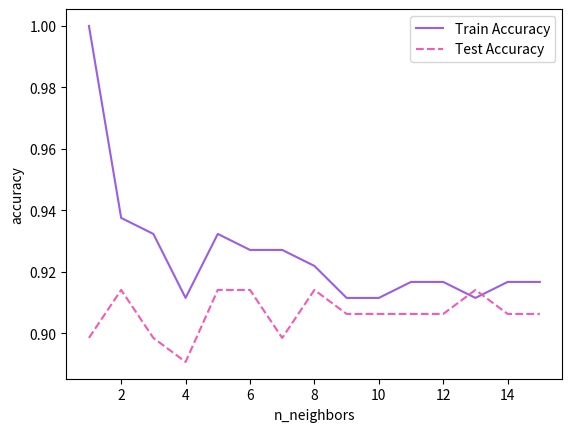

In [45]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

- n_neighbors가 작으면 과대적합, 크면 과소적합

In [46]:
n_neighbors=6 #선택

In [47]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)
# zip( list1, list2, …)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neihtbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neihtbors[1], weights = para_weights[1]
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=1, weights='distance')

KNeighborsClassifier(n_neighbors=2, weights='distance')

KNeighborsClassifier(n_neighbors=3, weights='distance')

KNeighborsClassifier(n_neighbors=4, weights='distance')

KNeighborsClassifier(weights='distance')

KNeighborsClassifier(n_neighbors=6, weights='distance')

KNeighborsClassifier(n_neighbors=7, weights='distance')

KNeighborsClassifier(n_neighbors=8, weights='distance')

KNeighborsClassifier(n_neighbors=9, weights='distance')

KNeighborsClassifier(n_neighbors=10, weights='distance')

Neighbors   Weights  TrainAccuracy  TestAccuracy
0           1   uniform          1.000         0.898
1           2   uniform          0.938         0.914
2           3   uniform          0.932         0.898
3           4   uniform          0.911         0.891
4           5   uniform          0.932         0.914
5           6   uniform          0.927         0.914
6           7   uniform          0.927         0.898
7           8   uniform          0.922         0.914
8           9   uniform          0.911         0.906
9          10   uniform          0.911         0.906
10          1  distance          1.000         0.898
11          2  distance          1.000         0.898
12          3  distance          1.000         0.898
13          4  distance          1.000         0.898
14          5  distance          1.000         0.914
15          6  distance          1.000         0.930
16          7  distance          1.000         0.891
17          8  distance          1.000         0.906
18          9  distance          1.000         0.914
19         10  distance          1.000         0.930

In [48]:
# 결과 확인을 위한 데이터 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                      values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.898438  0.898438
2                   1.0  0.937500     0.898438  0.914062
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250

In [49]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head(10)

TrainAccuracy_distance  TrainAccuracy_uniform  \
Neighbors                                                  
1                             1.0               1.000000   
2                             1.0               0.937500   
3                             1.0               0.932292   
4                             1.0               0.911458   
5                             1.0               0.932292   
6                             1.0               0.927083   
7                             1.0               0.927083   
8                             1.0               0.921875   
9                             1.0               0.911458   
10                            1.0               0.911458   

           TestAccuracy_distance  TestAccuracy_uniform  
Neighbors                                               
1                       0.898438              0.898438  
2                       0.898438              0.914062  
3                       0.898438              0.898438  
4                       0.898438              0.890625  
5                       0.914062              0.914062  
6                       0.929688              0.914062  
7                       0.890625              0.898438  
8                       0.906250              0.914062  
9                       0.914062              0.906250  
10                      0.929688              0.906250

<AxesSubplot:xlabel='Neighbors'>

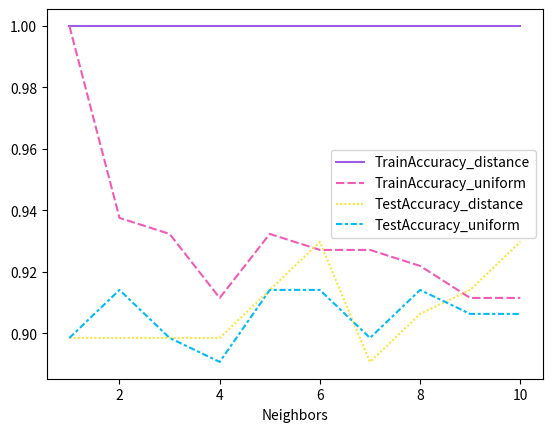

In [50]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

- 가중치 distance일 때 Train 모델의 정확도는 1 (과대적합).

In [51]:
# 임의로 지정
weights = "uniform"

In [52]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 거리 계산 방법 (euclidean, manhattan)
para_metric = ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

KNeighborsClassifier(metric='manhattan')

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

Neighbors     Metric  TrainAccuracy  TestAccuracy
0           1  euclidean          1.000         0.898
1           2  euclidean          0.938         0.914
2           3  euclidean          0.932         0.898
3           4  euclidean          0.911         0.891
4           5  euclidean          0.932         0.914
5           6  euclidean          0.927         0.914
6           7  euclidean          0.927         0.898
7           8  euclidean          0.922         0.914
8           9  euclidean          0.911         0.906
9          10  euclidean          0.911         0.906
10          1  manhattan          1.000         0.906
11          2  manhattan          0.953         0.930
12          3  manhattan          0.932         0.898
13          4  manhattan          0.922         0.914
14          5  manhattan          0.943         0.938
15          6  manhattan          0.927         0.922
16          7  manhattan          0.917         0.922
17          8  manhattan          0.927         0.914
18          9  manhattan          0.917         0.914
19         10  manhattan          0.911         0.930

<AxesSubplot:xlabel='Neighbors'>

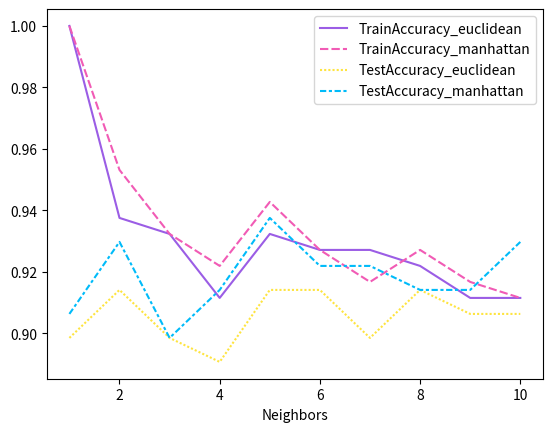

In [53]:
# 결과 확인을 위한 데이터 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

In [54]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 6, weights = "uniform",metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)
# train 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

train data accuracy: 0.927
test data accuracy: 0.914

Confusion matrix: 
[[94  3]
 [ 8 23]]
              precision    recall  f1-score   support

           0      0.922     0.969     0.945        97
           1      0.885     0.742     0.807        31

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



- 기본 옵션 모델의 정확도 Train 93.2%, Test 92.7%, 
    이웃 수, 가중치, 거리 계산 방법별 이웃 수 조정하여 얻은 정확도 Train 92.7%, test 91.4%

- f1-score, precision, recall 모두 >=0.5 인 값을 도출
- 기존의 모델 정확도와 KNN분류 후 모델 정확도가 동일